In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.tensorboard import SummaryWriter


In [2]:
dataset = load_iris()
X = np.array(dataset.data)
y = np.array(dataset.target)

X = torch.utils.data.DataLoader(X)
target = torch.utils.data.DataLoader(y)

In [61]:

class Attention(nn.Module):
    def __init__(self):
        super(Attention,self).__init__()
        
        
        self.k = torch.rand(4,4)
        self.q = torch.rand(4,4)
        self.v = torch.rand(4,4)
      
        
        self.fc1 = nn.Linear(16,3)
        
        self.softmax = nn.Softmax(dim=0)
    
    def forward(self,X):
        key_input = self.k * X
        query_input = self.q * X
        value_input = self.v * X
        
        dv_dot = torch.matmul(query_input, key_input)
        k_dim = np.sqrt(self.k.shape[0])
        
        output_matmul = torch.matmul(self.softmax(dv_dot/k_dim) , value_input)
        
        output_reshape = output_matmul.view(-1).float()

        output_fc1 = self.fc1(output_reshape)
        output = self.softmax(output_fc1)
        
        return output

In [70]:
network = Attention()


In [71]:
creatrion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(network.parameters())


In [74]:
# training
losses = []
for i in range(100):
    
    dataiter_x = iter(X)
    dataiter_y = iter(target)

    x = dataiter_x.next()
    y = dataiter_y.next()
    output = network(x)
    #output = network(torch.tensor(x))


    loss = creatrion(output.view(1,-1),y)

    optimizer.zero_grad()  

    loss.backward()
    optimizer.step() 
    losses.append(loss.item())
    

In [75]:
%matplotlib inline

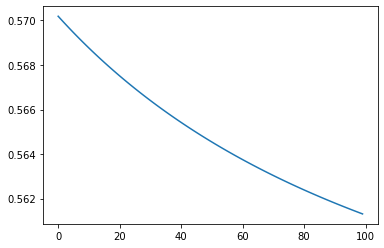

In [76]:
plt.plot(losses)

In [77]:
writer = SummaryWriter('runs/fashion_mnist_experiment_1')
for i in range(100):
    writer.add_scalar("loss",np.random.rand(),i)
    writer.add_scalar("accuracy",np.random.rand(),i)

In [79]:
x = iter(X)
writer.add_graph(network, next(x))
writer.close()